# Influenza Evolution

Small example of Influenza A HA phylogenetic analysis.

## Notebook Setup

In [1]:
import re
from ete3 import Tree, TextFace, TreeStyle

## Read in Data 

In [2]:
tree = Tree("RAxML_bestTree.H1_tree.newick")

## Process tree data

In [3]:
tree_meta = {}
p = "/(?P<year>\d\d\d\d)_"
for node in tree.traverse():
    if node.is_leaf():
        year = re.search(p, node.name)["year"]
        host = "pig" if "swine" in node.name else "human"
        tree_meta[node.name] = {"year":year, "host":host, "year_internal":int(year)-1918}

## Build Tree

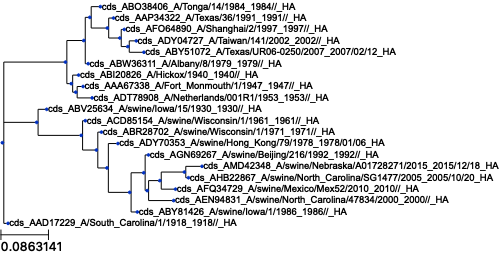

In [4]:
t = Tree("RAxML_bestTree.H1_tree.newick")
ts = TreeStyle()
ts.show_leaf_name = True
ts.show_branch_length = False
ts.show_branch_support = False
t.render(file_name="%%inline", w=500, tree_style=ts)

## Color Tree by host

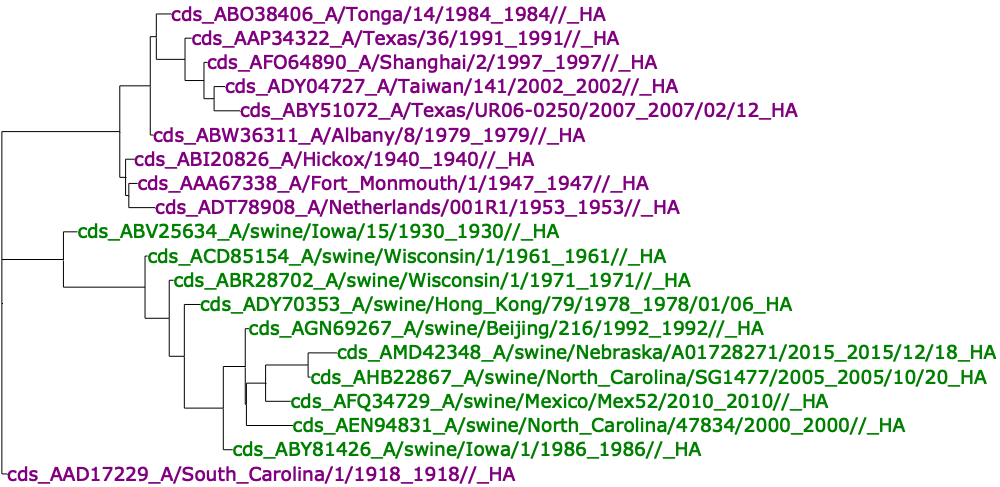

In [7]:
# Build Tree
p = "/(?P<year>\d\d\d\d)_"
tree = Tree("RAxML_bestTree.H1_tree.newick")
host_colors = {"human":"purple", "pig":"green"}

for node in tree.traverse():
    node.img_style["size"] = 0
    if node.is_leaf():
        color = host_colors[tree_meta.get(node.name)["host"]]
        name_face = TextFace(node.name, fgcolor=color, fsize=10)
        node.add_face = node.add_face(name_face, column=0, position='branch-right')
ts = TreeStyle()
ts.show_leaf_name = False
ts.show_scale = False
tree.render(file_name="%%inline", dpi=300, w=1000, tree_style=ts)

## Add pictures to the nodes

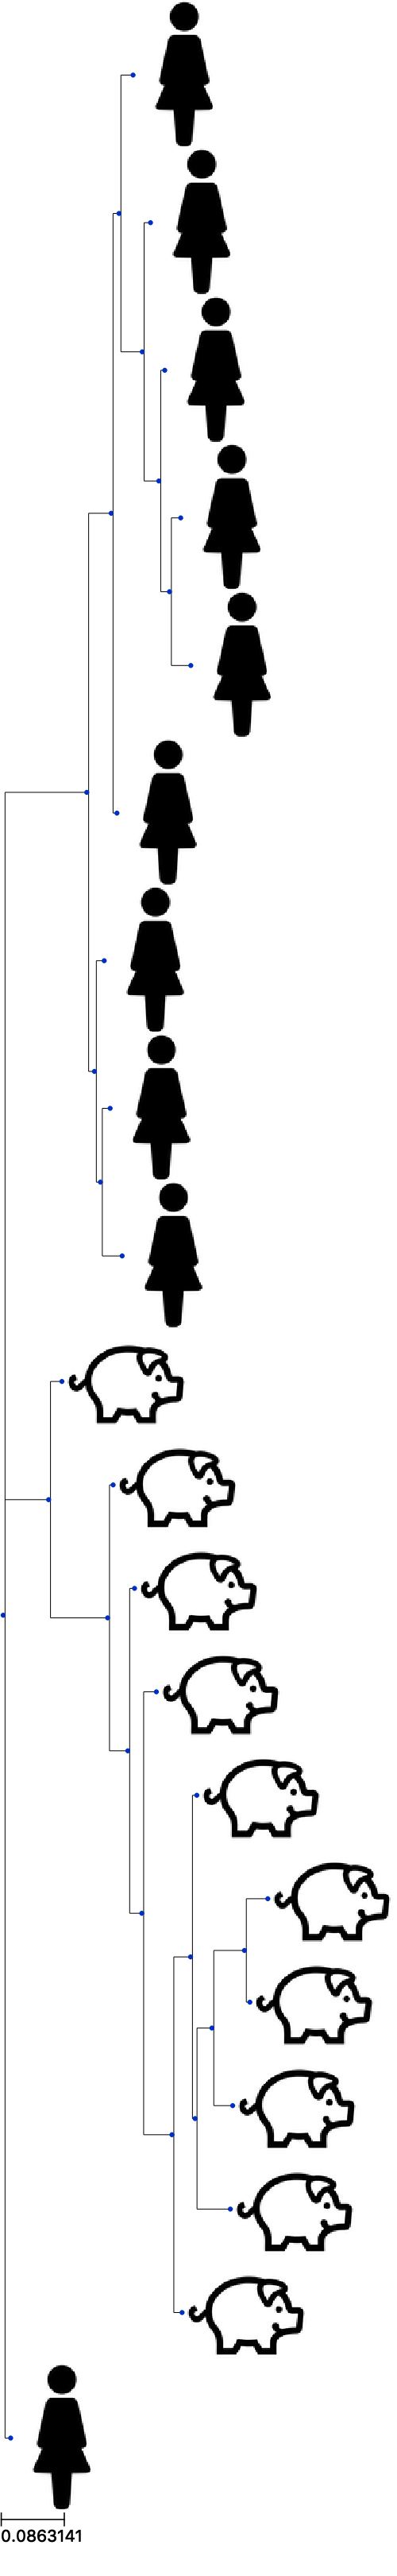

In [8]:
# Import Tree instance and faces module
from ete3 import Tree, faces, TreeStyle

tree = Tree("RAxML_bestTree.H1_tree.newick")

# Set the path in which images are located
img_path = "./"
# Create faces based on external images
humanFace = faces.ImgFace(img_path+"noun_woman.png")
pigFace = faces.ImgFace(img_path+"noun_pig.png")

nameFace = faces.AttrFace("name", fsize=0.5, fgcolor="#009000")

def mylayout(node):
    if node.is_leaf():
        if tree_meta[node.name]["host"] == "pig":
            faces.add_face_to_node(pigFace, node, column=0)
        else:
            faces.add_face_to_node(humanFace, node, column=0)
ts = TreeStyle()
ts.layout_fn = mylayout
ts.show_leaf_name = False
tree.render(file_name="%%inline", dpi=500, w=500, tree_style=ts)